In [146]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import squarify
import numpy as np
import matplotlib.ticker as mticker
# Read in the data
df = pd.read_csv('../data/final/sanitary_registry_medicines.csv')

# Global variables

top_manufacturers = df.groupby(['manufacturer']).size().reset_index(name='total').sort_values(['total'], ascending=False).head(5)
filtered_df = df[df['manufacturer'].isin(top_manufacturers['manufacturer'])]

C:\Users\Carlos Olivo\AppData\Local\Temp\ipykernel_4684\210797359.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  create_label = lambda x: str(x[0]).capitalize() + f' \n { format((x[1] * 100 /  total_counts) / 100 ,".00%")  } ({str(x[1])})  '


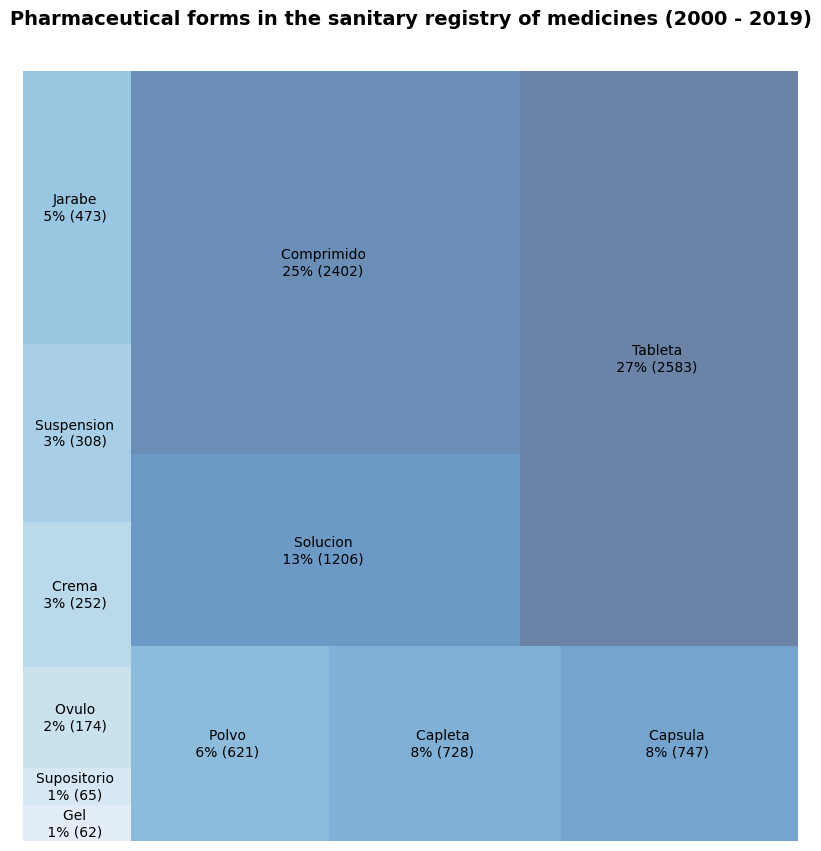

In [147]:
# Plot the count of each pharmaceutical form

pharmaceutical_forms = df.value_counts('pharmaceutical_form').reset_index(name='count').sort_values(['count'], ascending=True)

# Create a color map
cmap = matplotlib.cm.Blues 
mini=min(pharmaceutical_forms['count'])

maxi=max(pharmaceutical_forms['count'])

norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)

colors = [cmap(norm(value)) for value in pharmaceutical_forms['count']]

# Create the labels values
total_counts = pharmaceutical_forms['count'].sum()

min_year = df['register_year'].min()

max_year = df['register_year'].max()

create_label = lambda x: str(x[0]).capitalize() + f' \n { format((x[1] * 100 /  total_counts) / 100 ,".00%")  } ({str(x[1])})  '

# Create the labels
pharmaceutical_forms_label = pharmaceutical_forms[['pharmaceutical_form', 'count']].apply(create_label, axis=1)

title =f'Pharmaceutical forms in the sanitary registry of medicines ({min_year} - {max_year})'

# Plot the treemap
plt.figure(figsize=(10,10))

squarify.plot(sizes=pharmaceutical_forms['count'], label=pharmaceutical_forms_label, alpha=.6, color=cmap(np.linspace(0.2, 1, 12)))

plt.axis('off')

plt.title(title, fontsize=14, fontweight='semibold', y=1.05)

plt.savefig('../reports/pharmaceutical_forms.png', dpi=300, bbox_inches='tight')

plt.show()


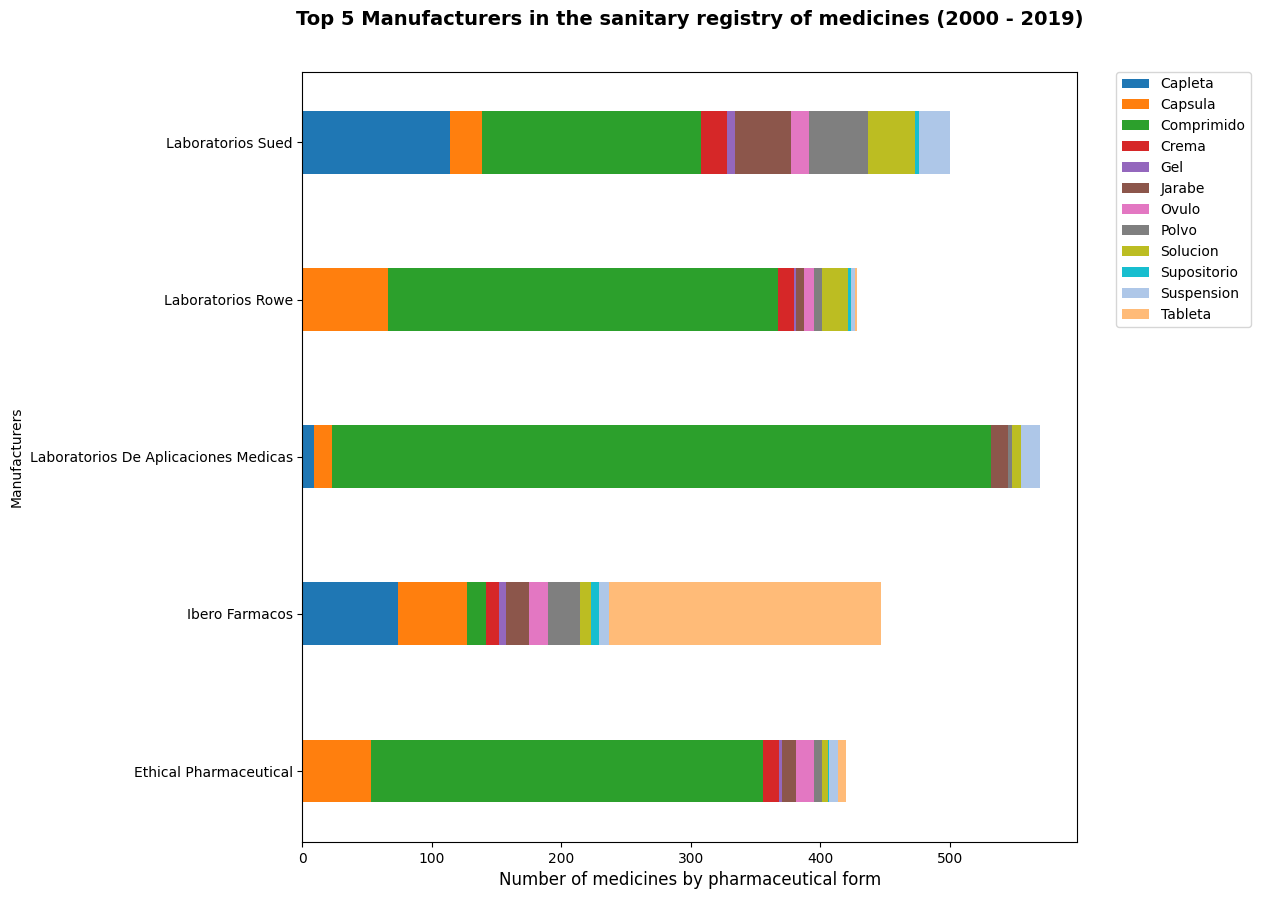

In [148]:
# Plot top 5 manufacturers in the sanitary registry of current medicines and their pharmaceutical forms 


manufacturers = filtered_df.pivot_table(index='manufacturer', columns='pharmaceutical_form', values='register_year', aggfunc='count').reset_index()

# Create the labels values

min_year = df['register_year'].min()

max_year = df['register_year'].max()

manufacturers['manufacturer'] = manufacturers['manufacturer'].str.title()

manufacturers.columns = manufacturers.columns.str.title()
colors = [
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd',
    '#8c564b',
    '#e377c2',
    '#7f7f7f',
    '#bcbd22',
    '#17becf',
    '#aec7e8',
    '#ffbb78',
]
manufacturers.plot.barh(x='Manufacturer',stacked=True, figsize=(10,10),color=colors, width=0.4)


title =f'Top 5 Manufacturers in the sanitary registry of medicines ({min_year} - {max_year})'

plt.title(title, fontsize=14, fontweight='semibold', y=1.05)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.xlabel('Number of medicines by pharmaceutical form', fontsize=12, )

plt.ylabel('Manufacturers')

plt.savefig('../reports/top_manufacturers.png', bbox_inches='tight')

plt.show()


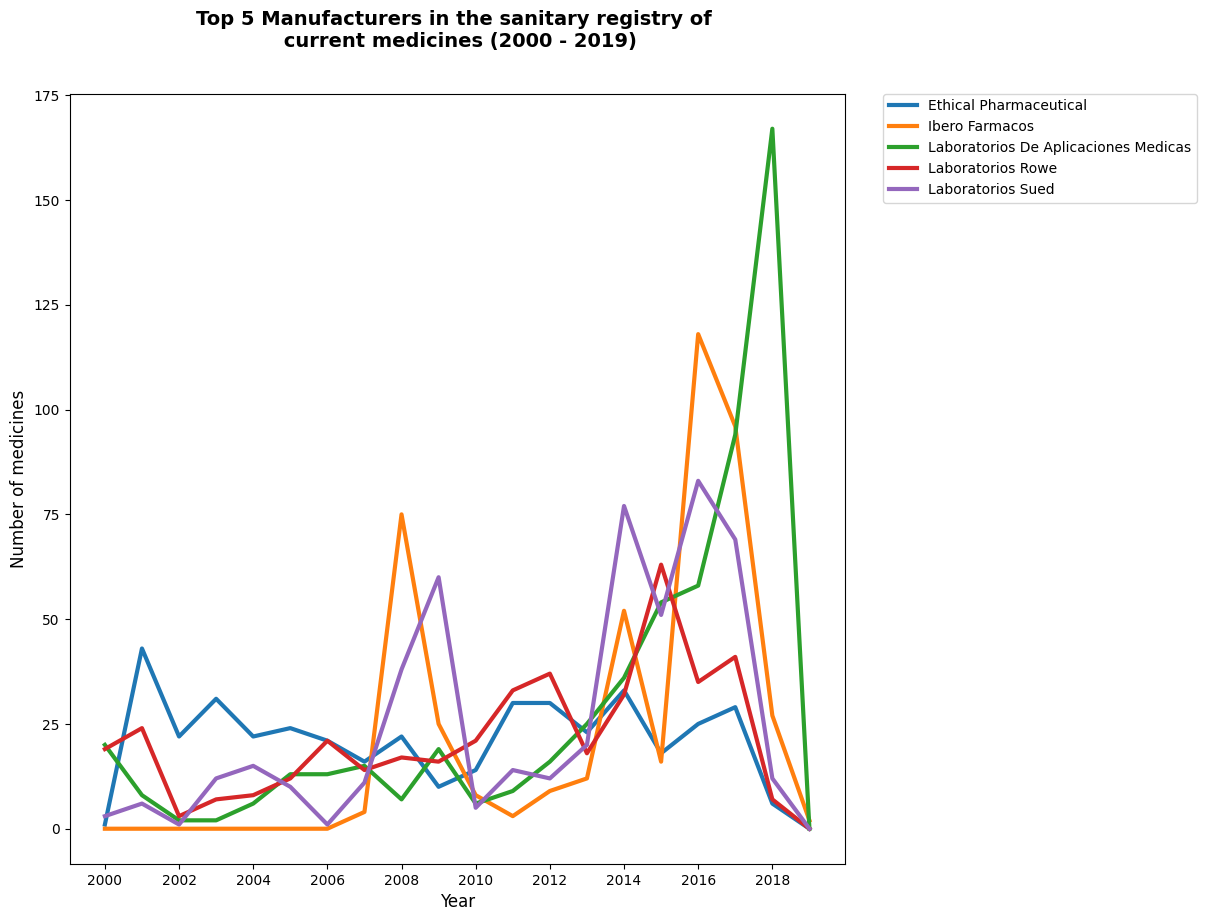

In [149]:
# Plot top 5 manufacturers in the sanitary registry of medicines.

manufacturers_history = filtered_df.groupby(['register_year', 'manufacturer']).size().reset_index(name='total').sort_values(['register_year'], ascending=True)

manufacturers_history['manufacturer'] = manufacturers_history['manufacturer'].str.title()

manufacturers_history = manufacturers_history.pivot_table(index='register_year', columns='manufacturer', values='total', aggfunc='sum').reset_index()

manufacturers_history = manufacturers_history.fillna(0)

manufacturers_history.plot(x='register_year', y=manufacturers_history.columns[1:], figsize=(10,10), linewidth=3)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

title =f'Top 5 Manufacturers in the sanitary registry of \n current medicines ({min_year} - {max_year})'

plt.title(title, fontsize=14, fontweight='semibold', y=1.05)

plt.xlabel('Year', fontsize=12, )

plt.ylabel('Number of medicines', fontsize=12, )

plt.savefig('../reports/top_manufacturers_history.png', bbox_inches='tight')

plt.show()


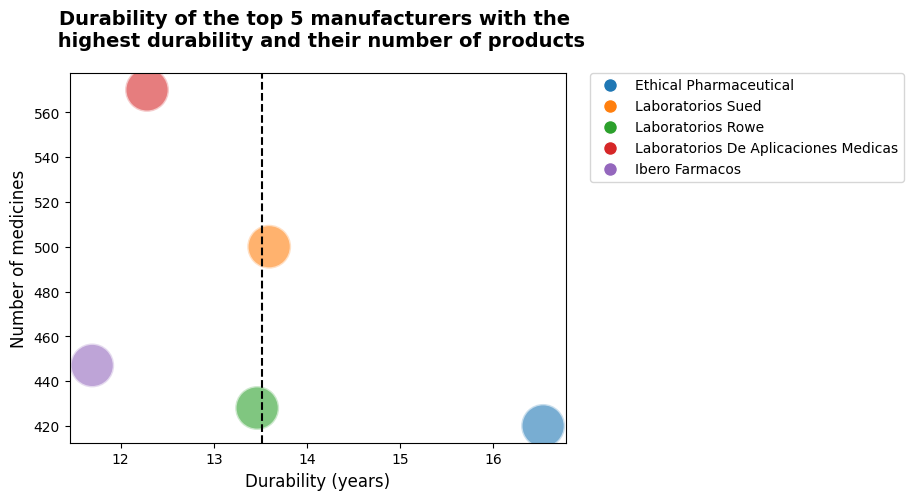

In [156]:
# Top 5  manufacturers with the highest durability and their number of products.


manufacturers_by_durability = filtered_df.groupby('manufacturer').agg({'durability': 'mean','register_year': 'count'}).reset_index()

manufacturers_by_durability = manufacturers_by_durability.sort_values(['durability'], ascending=False).head(5)

colors = [
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd',
 
]

fig, ax = plt.subplots()

manufacturers_by_durability['manufacturer'] = manufacturers_by_durability['manufacturer'].str.title() 

ax.scatter(
    x=manufacturers_by_durability['durability'],
    y=manufacturers_by_durability['register_year'],
    s=1000,
    c=colors,
    alpha=0.6,
    edgecolors="white",
    linewidth=2,
   
)
    
custom_lines = [matplotlib.lines.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10) for i in range(len(colors))]

ax.legend(custom_lines, manufacturers_by_durability['manufacturer'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


plt.xlabel('Durability (years)', fontsize=12 )

plt.ylabel('Number of medicines', fontsize=12 )

title = 'Durability of the top 5 manufacturers with the \n highest durability and their number of products'

mean = manufacturers_by_durability['durability'].mean()

plt.axvline(x=mean, color='black', linestyle='--')

plt.title(title, fontsize=14, fontweight='semibold', y=1.05)

plt.savefig('../reports/top_manufacturers_durability.png', bbox_inches='tight')

plt.show()



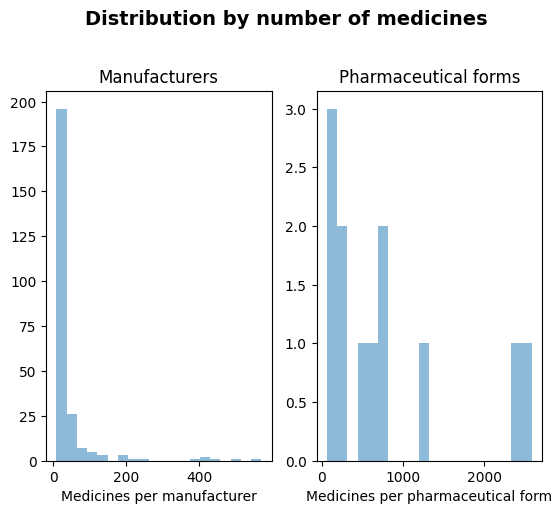

In [151]:
# Distribution of the manufacturers and pharmaceutical forms by number of products
fig,axs = plt.subplots(1,2,)

manufacturers_distribution = df.groupby('manufacturer').size().reset_index(name='total').sort_values(by='total', ascending=False)

pharmaceutical_forms_distribution = df.groupby('pharmaceutical_form').size().reset_index(name='total').sort_values(by='total', ascending=False)

fig.suptitle('Distribution by number of medicines', fontsize=14, fontweight='semibold', y=1.05)

axs[0].hist(manufacturers_distribution['total'], bins=20, alpha=0.5, label='Manufacturers')

axs[0].set_title('Manufacturers')
axs[0].set_xlabel('Medicines per manufacturer')

axs[1].hist(pharmaceutical_forms_distribution['total'], bins=20, alpha=0.5, label='Pharmaceutical forms')
axs[1].set_title('Pharmaceutical forms')
axs[1].set_xlabel('Medicines per pharmaceutical form')


plt.savefig('../reports/distributions.png')
plt.show()


